In [263]:
#set MongoDB environment
from pymongo import MongoClient

#mongoDB host / port / database
mongoHost = MongoClient('mongodb://192.168.1.67:27017')

In [276]:
import matplotlib.pyplot as plt
from math import pi

# Set function to create matplots
def plotme (listForCategories, listForvalues, scale, title):
    
    # number of variable
    N = len(listForvalues)
    
    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    listForvalues += listForvalues[:1]
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the spider plot
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111, polar=True)
 
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], listForCategories, color='grey', size=14)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    maximum = scale
    high = maximum * 0.75
    medium = maximum * 0.5
    minimum = maximum * 0.25
    plt.yticks([minimum,medium,high], [], color="grey", size=14)
    plt.ylim(0,maximum)
    plt.title(title)
 
    # Plot data
    ax.plot(angles, listForvalues, linewidth=1, linestyle='solid')
 
    # Fill area
    ax.fill(angles, listForvalues, 'b', alpha=0.1)
    return

Accounts found : tim_cook
Accounts found : EmmaWatson
Accounts found : Jae0Pierre
Accounts found : lvanel_IBM
Accounts found : Thom_astro
Accounts found : paulocoelho
Accounts found : theresa_may
Accounts found : nsekkaki
Accounts found : realDonaldTrump
Accounts found : IBMWatson
Accounts found : Jaddo_fr
Accounts found : elonmusk
Accounts found : BillGates
Accounts found : BarackObama
Accounts found : satyanadella
Accounts found : David_Cameron
Accounts found : cathcoste
Accounts found : AstroKatie
Accounts found : EmmanuelMacron
Accounts found : VasquesXavier
Accounts found : JeffBezos
Accounts found : NASA
Accounts found : Bouletcorp
Enter Account Name to produce the graphics :Jaddo_fr


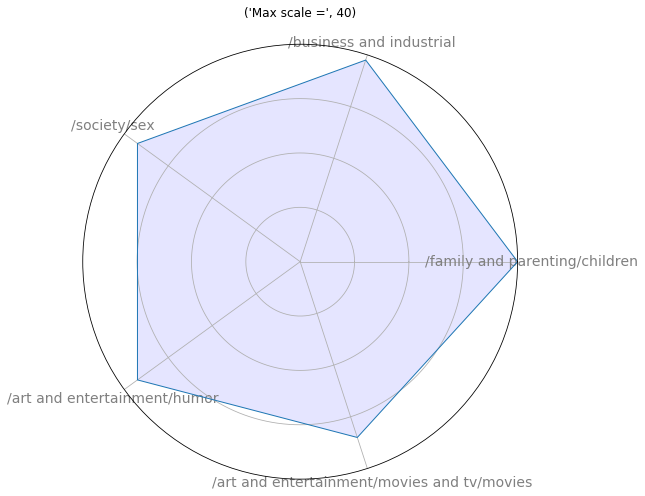

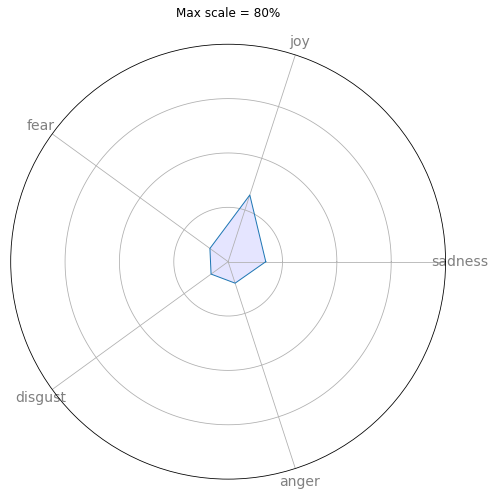

In [283]:
#Retrieve category stats per user

#iterate on all collections to retrieve category and emotion data
for CategoriesCollection in mongoHost.categories.collection_names():
    print("Accounts found :", CategoriesCollection)

CategoriesCollection = input("Enter Account Name to produce the graphics :")
#build collection parameters for sentiment and categories based on categories
CategoriesCollectionName = getattr(mongoHost.categories,CategoriesCollection)
sentimentsCollectionName = getattr(mongoHost.sentiment,CategoriesCollection)
    
#initiate lists that contains labels and values for graphics
listForCategoriesvalues = []
listForCategories = []
listForSentimentsvalues = []
listForSentiments = []    
    
for categories in CategoriesCollectionName.find({},{'_id' : 0}).sort("count", -1).limit(5):
    listForCategories.append(categories['label'])
    listForCategoriesvalues.append(categories['count'])
    
#call graph function for categories
scale = max(listForCategoriesvalues)
title = ("Max scale =", scale)
plotme (listForCategories, listForCategoriesvalues, scale, title)
    
    
    
for sentiments in sentimentsCollectionName.find({},{'_id' : 0}):
    listForSentiments.append(sentiments['label'])
    listForSentimentsvalues.append(sentiments['count'])
#call graph function for sentiment
title = ("Max scale = 80%")
plotme (listForSentiments, listForSentimentsvalues, 80, title)
    
listForCategoriesvalues = None
listForCategories = None
listForSentimentsvalues = None
listForSentiments = None